In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("bank-full.csv",sep=";")

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
keep = ['age',
'job',
'marital',
'education',
'balance',
'housing',
'contact',
'day',
'month',
'duration',
'campaign',
'pdays',
'previous',
'poutcome',
'y']

In [5]:
df_keep = df[keep]

In [6]:
df_keep.isna().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#### Question 1 - What is the most frequent observation (mode) for the column education?


In [7]:
df_keep['education'].mode()

0    secondary
Name: education, dtype: object

In [8]:
df_keep.education.value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

#### Question 2 - What are the two features that have the biggest correlation?



In [9]:
num = ['age','balance','day','campaign','day','pdays','previous']
df_num = df_keep[num]
df_num

,age,balance,day,campaign,day,pdays,previous
0,58,2143,5,1,5,-1,0
1,44,29,5,1,5,-1,0
2,33,2,5,1,5,-1,0
3,47,1506,5,1,5,-1,0
4,33,1,5,1,5,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,3,17,-1,0
45207,71,1729,17,2,17,-1,0
45208,72,5715,17,5,17,184,3
45209,57,668,17,4,17,-1,0


In [10]:
df_num.corr()

,age,balance,day,campaign,day,pdays,previous
age,1.000000,0.097783,-0.009120,0.004760,-0.009120,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,-0.014578,0.004503,0.003435,0.016674
day,-0.009120,0.004503,1.000000,0.162490,1.000000,-0.093044,-0.051710
campaign,0.004760,-0.014578,0.162490,1.000000,0.162490,-0.088628,-0.032855
day,-0.009120,0.004503,1.000000,0.162490,1.000000,-0.093044,-0.051710
pdays,-0.023758,0.003435,-0.093044,-0.088628,-0.093044,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,-0.032855,-0.051710,0.454820,1.000000


<Axes: >

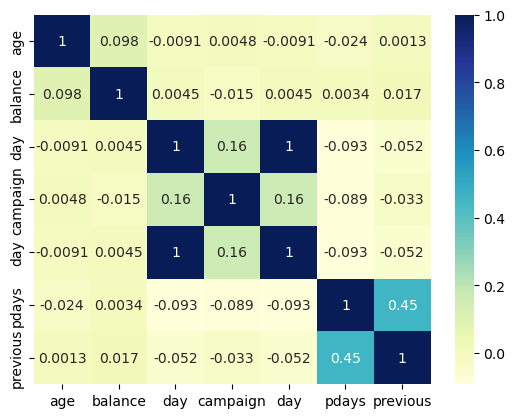

In [11]:
import seaborn as sns
sns.heatmap(df_num.corr(),cmap="YlGnBu", annot=True)

##### Target Encoding

In [12]:
df_keep['y'] = (df_keep['y'] == 'yes').astype(int)

C:\Users\Owner\AppData\Local\Temp\ipykernel_18300\649203497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_keep['y'] = (df_keep['y'] == 'yes').astype(int)


##### Split the data

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
df_full_train, df_test = train_test_split(df_keep, test_size = 0.2, random_state=42)
df_full_train.shape, df_test.shape

((36168, 15), (9043, 15))

In [15]:
df_train, df_val  = train_test_split(df_full_train, test_size = 0.25, random_state=42)
df_train.shape, df_val.shape

((27126, 15), (9042, 15))

In [16]:
df_train = df_train.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)

y_train = df_train['y'].values
y_test = df_test['y'].values
y_val = df_val['y'].values

del df_train['y']
del df_test['y']
del df_val['y']

#### Question 3 - 

1. Calculate the mutual information score between y and other categorical variables in the dataset. Use the training set only. <br>2. 
Round the scores to 2 decimals using round(score, 2).

In [17]:
from sklearn.metrics import mutual_info_score

In [18]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, y_train)

In [19]:
vars = ['contact','housing','education','poutcome']
mi = df_train[vars].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

poutcome     0.029533
contact      0.013356
housing      0.010343
education    0.002697
dtype: float64

#### Question 4

In [20]:
from sklearn.feature_extraction import DictVectorizer

In [21]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [22]:
X_train

array([[3.200e+01, 1.100e+03, 1.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [3.800e+01, 0.000e+00, 1.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [4.900e+01, 3.309e+03, 2.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [5.400e+01, 0.000e+00, 1.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.500e+01, 2.311e+03, 2.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [3.000e+01, 1.500e+01, 2.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

In [24]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [25]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.0125799 , 0.00939575, 0.14708588, ..., 0.04843197, 0.00881176,
       0.27923652])

In [26]:
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

0.9015704490157045

#### Question 5

In [33]:
#Accuracy of model with all features - to be used as a baseline for the following 4 models
accuracy_base_case = (y_val == churn_decision).mean()
accuracy_base_case

0.9015704490157045

In [62]:
vars_to_exclude  = ['age','balance','marital','previous']

In [63]:
accuracy=[]
for i in vars_to_exclude:
    
    #converting to dictionaries
    train_dict = df_train.drop(i,axis=1).to_dict(orient='records')
    val_dict = df_val.drop(i,axis=1).to_dict(orient='records')
    
    #One hot encoding
    X_train = dv.fit_transform(train_dict)
    X_val = dv.transform(val_dict)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    
    #fitting the model
    model.fit(X_train, y_train)

    #making predictions
    y_pred = model.predict_proba(X_val)[:,1]
    y_pred

    #calculating accuracy with the prediction threshold of >=0.5
    churn_decision = (y_pred >= 0.5)
    accuracy.append((y_val == churn_decision).mean())

In [64]:
final =  pd.DataFrame({'variables_excluded':vars_to_exclude,
              'model_accuracy':accuracy})
final['difference'] = final['model_accuracy'] - accuracy_base_case

final.sort_values('difference',ascending=True)

,variables_excluded,model_accuracy,difference
0,age,0.900243,-0.001327
1,balance,0.900686,-0.000885
2,marital,0.901239,-0.000332
3,previous,0.901349,-0.000221


#### Question 6

In [66]:
c = [0.01, 0.1, 1, 10, 100]
train_dict = df_train.to_dict(orient='records')
val_dict = df_val.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)
accuracy = []

for i in c:

    #instantiate the model
    model = LogisticRegression(solver='liblinear', C=i, max_iter=1000, random_state=42)
    
    #fitting the model
    model.fit(X_train, y_train)

    #making predictions
    y_pred = model.predict_proba(X_val)[:,1]
    y_pred

    #calculating accuracy with the prediction threshold of >=0.5
    churn_decision = (y_pred >= 0.5)
    accuracy.append((y_val == churn_decision).mean())


In [67]:
accuracy

[0.8980314089803141,
 0.9013492590134926,
 0.9015704490157045,
 0.9009068790090687,
 0.9011280690112807]

In [78]:
final = pd.DataFrame({'c':c,
              'accuracy':accuracy})
final = final.sort_values('accuracy',ascending=False)
final.reset_index(drop=True, inplace=True) 
final

,c,accuracy
0,1.00,0.901570
1,0.10,0.901349
2,100.00,0.901128
3,10.00,0.900907
4,0.01,0.898031
